In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

from PIL import Image
import json

%load_ext autoreload
%autoreload 2
import sys 
sys.path.append("/hkfs/work/workspace_haic/scratch/qx6387-WetKoalas/HIDA-Hackathon")
from dataset import DroneImages

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
def show_sample(idx, path = "/hkfs/work/workspace_haic/scratch/qx6387-hida-hackathon-data/train"): 
    imgs_dir = os.listdir(path)
    img_data = np.load(Path(path).joinpath(imgs_dir[idx]))
    
    plt.figure(figsize=(16,5))
    
    plt.subplot(131)
    plt.imshow(img_data[:, :, :3])
    plt.title("RGB")
    plt.axis("off")
    
    plt.subplot(132)
    plt.imshow(img_data[:, :, 3])
    plt.title("Thermal")
    plt.colorbar()
    plt.axis("off")
    
    
    plt.subplot(133)
    plt.imshow(img_data[:, :, 4])
    plt.title("Depth")
    plt.colorbar()
    plt.axis("off")

    plt.show()


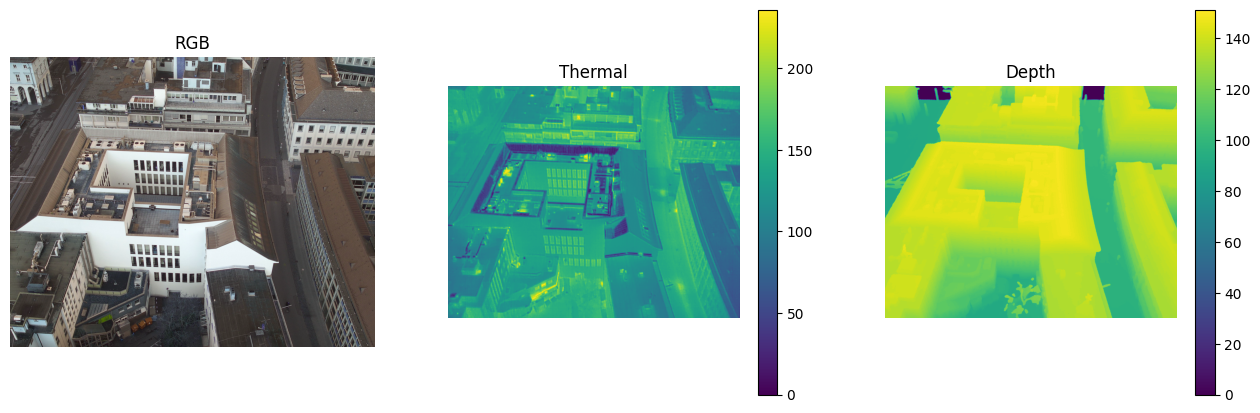

In [39]:
show_sample(2)

In [40]:
def show_sample_and_mask(idx, path): 
    dataset = DroneImages(path)
    img, label = dataset[idx]
    target_mask = label['masks'].sum(dim=0).clamp(0., 1.).squeeze() 
    
    plt.figure(figsize=(16,5))
    
    plt.subplot(131)
    plt.imshow(img[:3, :, :].permute(1,2,0))
    plt.imshow(np.ma.masked_array(target_mask, target_mask==0))
    plt.title("RGB")
    plt.axis("off")
    
    plt.subplot(132)
    plt.imshow(img[3, :, :])
    plt.imshow(np.ma.masked_array(target_mask, target_mask==0))
    plt.title("Thermal")
    plt.colorbar()
    plt.axis("off")
    
    
    plt.subplot(133)
    
    plt.imshow(img[4, :, :])
    plt.imshow(np.ma.masked_array(target_mask, target_mask==0))
    plt.title("Depth")
    plt.colorbar()
    plt.axis("off")

    plt.show()

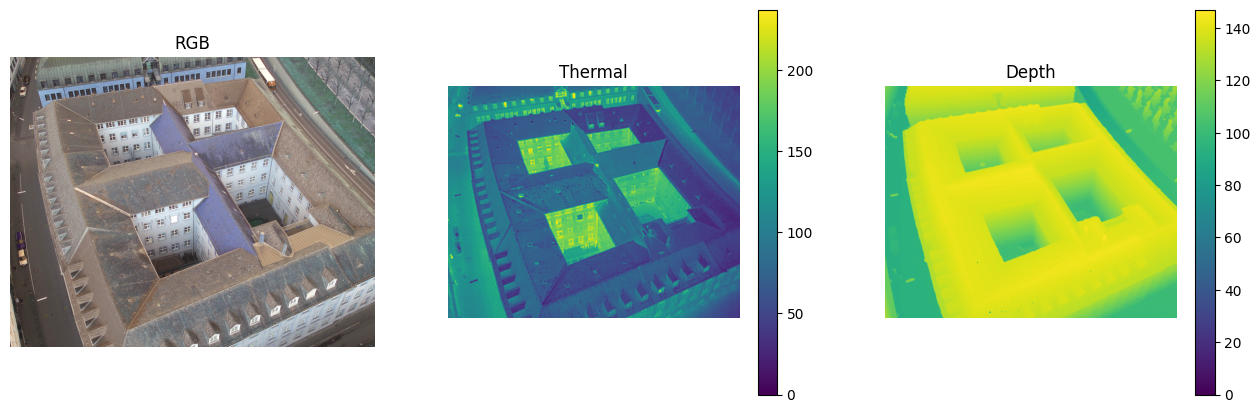

In [41]:
show_sample(8, "/hkfs/work/workspace_haic/scratch/qx6387-hida-hackathon-data/train")

In [4]:
path = "/hkfs/work/workspace_haic/scratch/qx6387-hida-hackathon-data/train"
imgs_dir = os.listdir(path)

In [24]:
idx = 4

img_data = np.load(Path(path).joinpath(imgs_dir[idx]))
temp_data = np.load(Path(path).joinpath(imgs_dir[idx]))[:, :, 3]
depth_data = np.load(Path(path).joinpath(imgs_dir[idx]))[:, :, 4]


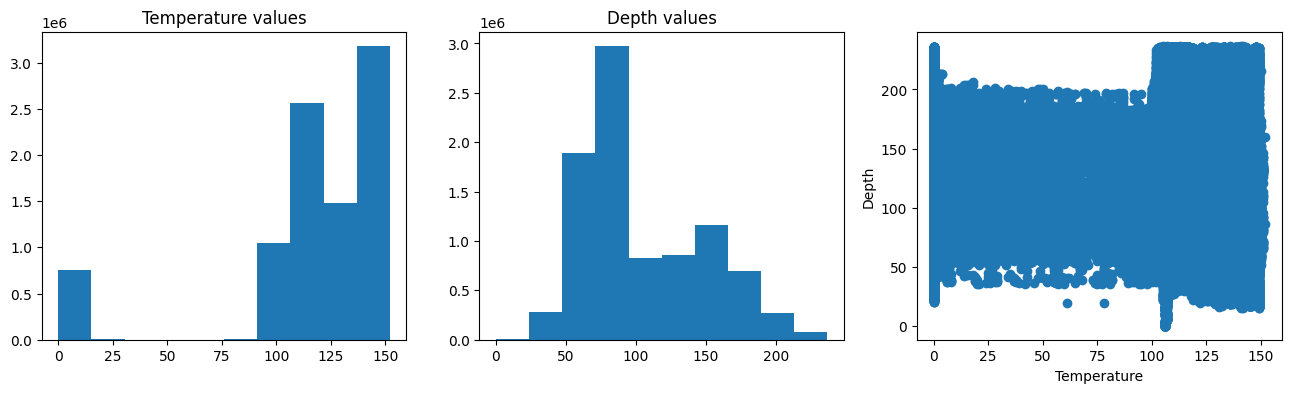

In [25]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.title("Temperature values")
plt.hist(temp_data.flatten())

plt.subplot(132)
plt.title("Depth values")
plt.hist(depth_data.flatten())

plt.subplot(133)
plt.scatter(temp_data.flatten(), depth_data.flatten())
plt.xlabel("Temperature")
plt.ylabel("Depth")
plt.show()


In [ ]:
### mean temperature 

In [33]:
mean_temp, min_temp, max_temp = [], [], []

for i in range(len(imgs_dir)): 
    if imgs_dir[i].endswith("npy"): 
        temp_data = np.load(Path(path).joinpath(imgs_dir[i]))[:, :, 3]
        mean_temp.append(np.mean(temp_data))
        min_temp.append(np.min(temp_data))
        max_temp.append(np.max(temp_data))

(array([111.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 862.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.]),
 array([236. , 236.1, 236.2, 236.3, 236.4, 236.5, 236.6, 236.7, 236.8,
        236.9, 237. , 237.1, 237.2, 237.3, 237.4, 237.5, 237.6, 237.7,
        237.8, 237.9, 238. ]),
 <BarContainer object of 20 artists>)

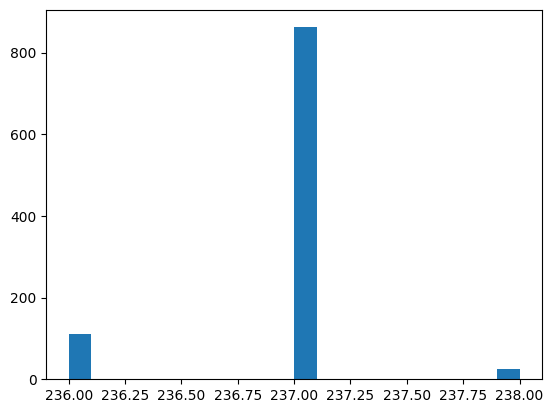

In [36]:
plt.hist(max_temp, bins=20)

In [ ]:
PATH = "/hkfs/work/workspace_haic/scratch/qx6387-hida-hackon-data/train"
with open(Path(PATH).joinpath("descriptor.json"), 'r') as f:
  data = json.load(f)